<a href="https://colab.research.google.com/github/PiotrKukula0/Formularz-Angular/blob/main/zad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving sydney.pkl to sydney.pkl


In [3]:
df = pd.read_pickle('sydney.pkl')
print(df)
print(df.columns)


                                                 title posted_ago  length  \
0         30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥     1 year    31.0   
1        30 Minute HIIT Tabata Workout Sydney Cummings     1 year    31.0   
2    30 Minute Abs Workout With Sydney Cummings | B...     1 year    32.0   
3      30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥     1 year    31.0   
4    30 Minute Workout For Beginners 🔥Burn 285 Calo...     1 year    31.0   
..                                                 ...        ...     ...   
724  40 Minute Upper Body and Cardio Finisher Worko...     4 days    43.0   
725  40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...     3 days    45.0   
726  30 Minute Sports Cardio Workout 🔥Burn 360 Calo...     2 days    34.0   
727  20 Minute Sore Body Deep Stretch | The CHANGE ...      1 day    22.0   
728  40 Minute Lean Legs Superset Workout🔥Burn 395 ...   11 hours    45.0   

      views                  link  calories       date  days_since_posted  

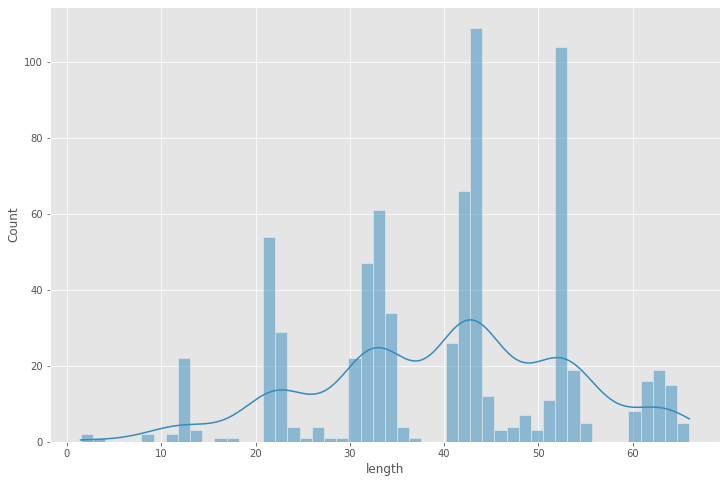

In [4]:
df_numeric = df.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['length'], bins=50, kde=True)


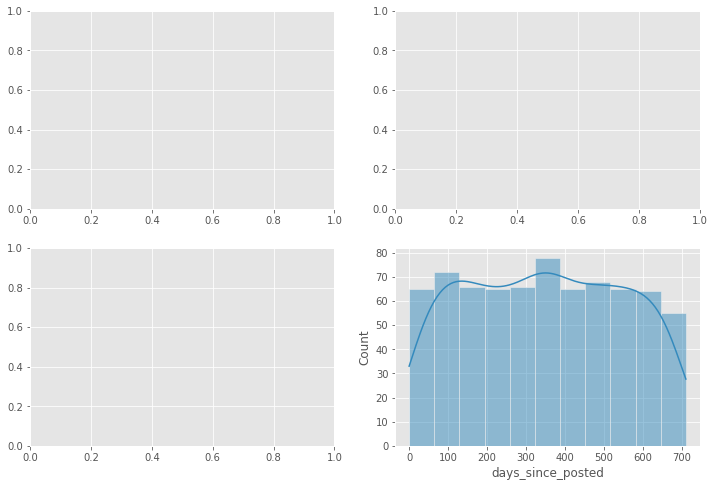

In [13]:
def plot_multiple_histograms(df, cols):
    num_plots = len (cols)
    num_cols = math.ceil (np.sqrt (num_plots))
    num_rows = math.ceil (num_plots / num_cols)

    fig, axs = plt.subplots (num_rows, num_cols)

    for ind, col in enumerate (cols):
        i = math.floor (ind / num_cols)
        j = ind - i * num_cols

    if num_rows == 1:
        if num_cols == 1:
            sns.histplot (df[col], kde=True, ax=axs)
        else:
            sns.histplot (df[col], kde=True, ax=axs[j])
    else:
        sns.histplot (df[col], kde=True, ax=axs[i, j])


plot_multiple_histograms (df, ['length', 'views', 'calories', 'days_since_posted'])


                                                 title posted_ago  \
0         30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥     1 year   
1        30 Minute HIIT Tabata Workout Sydney Cummings     1 year   
2    30 Minute Abs Workout With Sydney Cummings | B...     1 year   
3      30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥     1 year   
4    30 Minute Workout For Beginners 🔥Burn 285 Calo...     1 year   
..                                                 ...        ...   
724  40 Minute Upper Body and Cardio Finisher Worko...     4 days   
725  40 Minute LEGS Workout! 🔥Burn 490 Calories!* 🔥...     3 days   
726  30 Minute Sports Cardio Workout 🔥Burn 360 Calo...     2 days   
727  20 Minute Sore Body Deep Stretch | The CHANGE ...      1 day   
728  40 Minute Lean Legs Superset Workout🔥Burn 395 ...   11 hours   

                     link       date  \
0    /watch?v=Mcpyp9PRtU8 2018-02-01   
1    /watch?v=m40O_U8_4UE 2018-02-06   
2    /watch?v=DWUupF-Sfyc 2018-02-08   
3    /watch

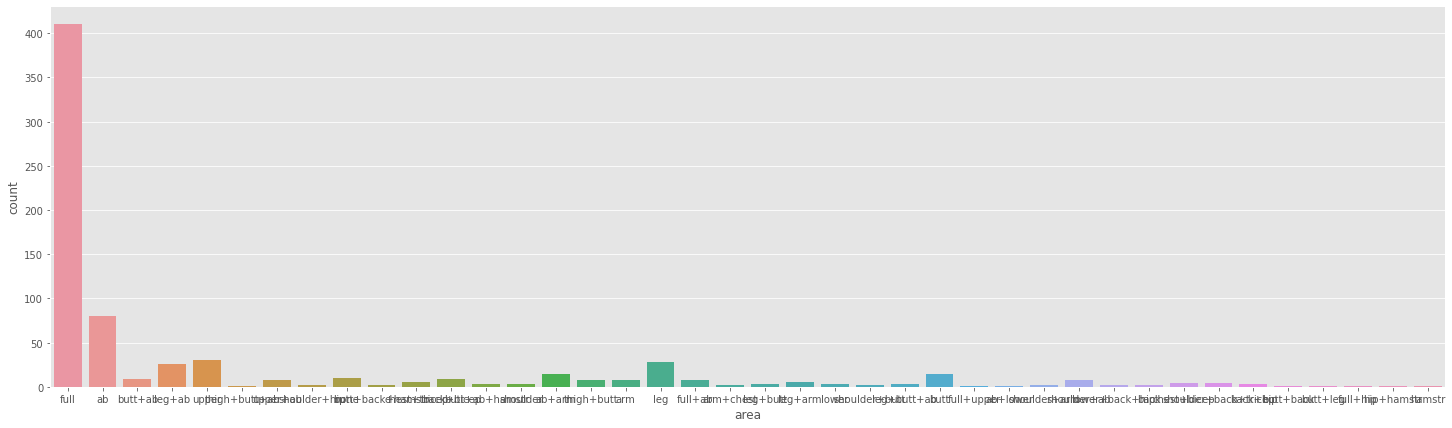

In [14]:
#select non-numeric variables
df_non_numeric = df.select_dtypes(exclude='number')
print(df_non_numeric)
plt.figure(figsize=(25,7))
sns.countplot(x="area",
 data=df_non_numeric)


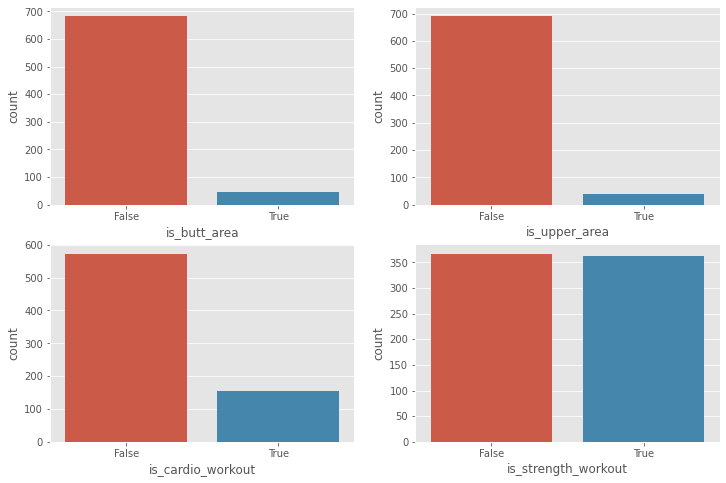

In [26]:
def plot_multiple_countplots(df, cols):
    num_plots = len (cols)
    num_cols = math.ceil (np.sqrt (num_plots))
    num_rows = math.ceil (num_plots / num_cols)

    fig, axs = plt.subplots (num_rows, num_cols)

    for ind, col in enumerate (cols):
        i = math.floor (ind / num_cols)
        j = ind - i * num_cols
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot (x=df[col], ax=axs)
            else:
                sns.countplot (x=df[col], ax=axs[j])
        else:
            sns.countplot (x=df[col], ax=axs[i, j])

plot_multiple_countplots (df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])


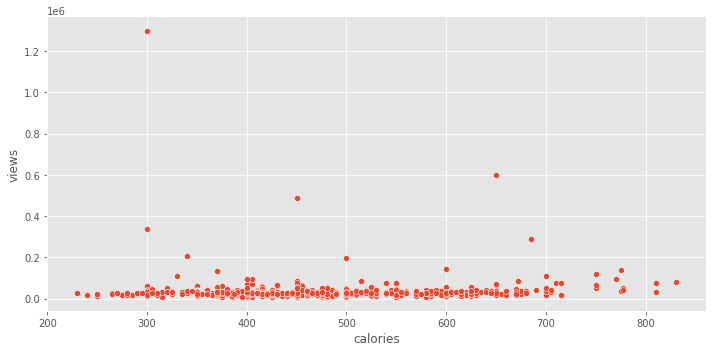

In [27]:
sns.relplot(x='calories', y='views', data=df, aspect=2.0)

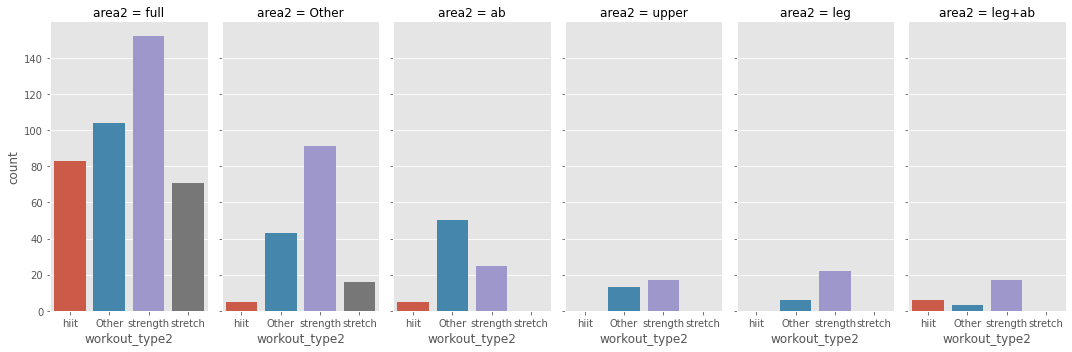

In [28]:
top6 = list(df['area'].value_counts().index[:5])
df['area2'] = df['area']
msk = df['area2'].isin(top6)
df.loc[~msk, 'area2'] = 'Other'
top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']
msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'
order = df['area2'].value_counts().index # order the columns from highest count to lowest.
sns.catplot(x="workout_type2",
 col='area2',
 col_order=order,
 kind="count", data=df,
 aspect=0.5)

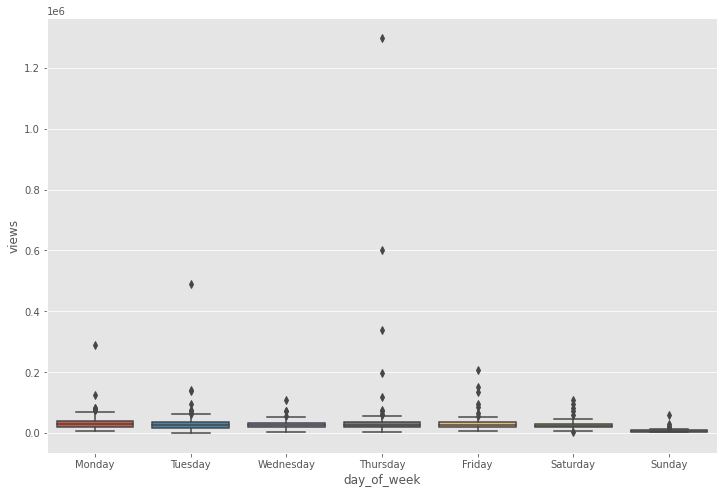

In [30]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x="day_of_week", y="views", data=df, order=order)

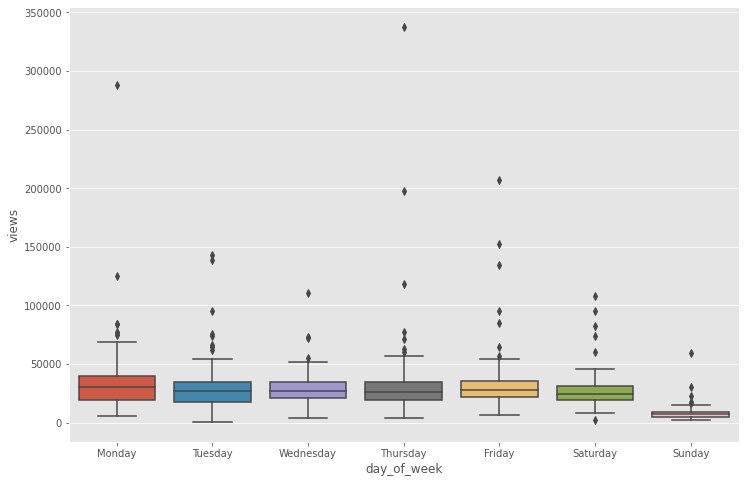

In [31]:
msk = df['views'] < 400000
sns.boxplot(x="day_of_week", y="views", data=df[msk], order=order)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you

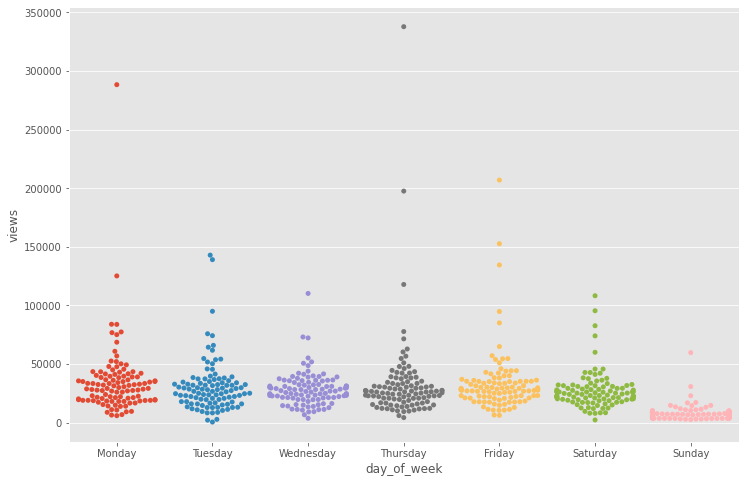

In [32]:
sns.swarmplot(x="day_of_week", y="views", data=df[msk], order=order)

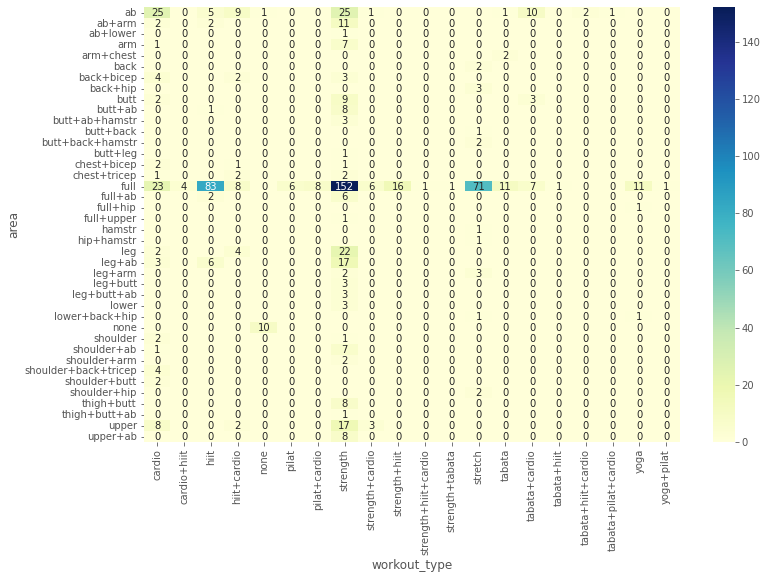

In [34]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)
sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")